<a href="https://colab.research.google.com/github/rizaru22/belajarpython/blob/main/breastCancerClassificationKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Breast Cancer Classification Using KNN Algorithm<h1>
<p>Features are computed from a digitized image of a Fine Needle Aspirate (FNA) of a breast mass. They describe characteristic of the cell nuclei present in the image</p>
<br>
<p>
Name : SAFRIZAL <br>
NIM : 20720251014 <br>
E-Mail : rizaru.2.2@gmail.com</p>

##Step 1 (preparing dataset)
using

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/kaggle


Mounted at /content/gdrive
/content/gdrive/My Drive/kaggle


In [2]:
import pandas as pd
dataset=pd.read_csv('data.csv')

In [3]:
#clear column contain NaN value from dataset
dataset=dataset.dropna(axis=1)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we have the clear dataset

In [4]:
#describe dataset
cols=set(dataset.columns)-{'id'}
new_data=dataset[list(cols)]
new_data.describe()

,symmetry_worst,fractal_dimension_mean,texture_worst,radius_se,radius_worst,area_mean,smoothness_se,concavity_se,concave points_mean,symmetry_mean,compactness_mean,area_se,concave points_worst,concave points_se,radius_mean,concavity_mean,compactness_se,perimeter_mean,texture_mean,fractal_dimension_worst,smoothness_mean,perimeter_se,area_worst,smoothness_worst,perimeter_worst,fractal_dimension_se,compactness_worst,symmetry_se,concavity_worst,texture_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.290076,0.062798,25.677223,0.405172,16.269190,654.889104,0.007041,0.031894,0.048919,0.181162,0.104341,40.337079,0.114606,0.011796,14.127292,0.088799,0.025478,91.969033,19.289649,0.083946,0.096360,2.866059,880.583128,0.132369,107.261213,0.003795,0.254265,0.020542,0.272188,1.216853
std,0.061867,0.007060,6.146258,0.277313,4.833242,351.914129,0.003003,0.030186,0.038803,0.027414,0.052813,45.491006,0.065732,0.006170,3.524049,0.079720,0.017908,24.298981,4.301036,0.018061,0.014064,2.021855,569.356993,0.022832,33.602542,0.002646,0.157336,0.008266,0.208624,0.551648
min,0.156500,0.049960,12.020000,0.111500,7.930000,143.500000,0.001713,0.000000,0.000000,0.106000,0.019380,6.802000,0.000000,0.000000,6.981000,0.000000,0.002252,43.790000,9.710000,0.055040,0.052630,0.757000,185.200000,0.071170,50.410000,0.000895,0.027290,0.007882,0.000000,0.360200
25%,0.250400,0.057700,21.080000,0.232400,13.010000,420.300000,0.005169,0.015090,0.020310,0.161900,0.064920,17.850000,0.064930,0.007638,11.700000,0.029560,0.013080,75.170000,16.170000,0.071460,0.086370,1.606000,515.300000,0.116600,84.110000,0.002248,0.147200,0.015160,0.114500,0.833900
50%,0.282200,0.061540,25.410000,0.324200,14.970000,551.100000,0.006380,0.025890,0.033500,0.179200,0.092630,24.530000,0.099930,0.010930,13.370000,0.061540,0.020450,86.240000,18.840000,0.080040,0.095870,2.287000,686.500000,0.131300,97.660000,0.003187,0.211900,0.018730,0.226700,1.108000
75%,0.317900,0.066120,29.720000,0.478900,18.790000,782.700000,0.008146,0.042050,0.074000,0.195700,0.130400,45.190000,0.161400,0.014710,15.780000,0.130700,0.032450,104.100000,21.800000,0.092080,0.105300,3.357000,1084.000000,0.146000,125.400000,0.004558,0.339100,0.023480,0.382900,1.474000
max,0.663800,0.097440,49.540000,2.873000,36.040000,2501.000000,0.031130,0.396000,0.201200,0.304000,0.345400,542.200000,0.291000,0.052790,28.110000,0.426800,0.135400,188.500000,39.280000,0.207500,0.163400,21.980000,4254.000000,0.222600,251.200000,0.029840,1.058000,0.078950,1.252000,4.885000


In [5]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

##Step 2 :Features Selection
select the best Features for the case

A. Features Score using Univariate Selection

In [8]:
#using Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selectFeatures = SelectKBest(chi2, k=1)
feature=dataset.drop(['id','diagnosis'],axis=1)
diagnosis=dataset['diagnosis']
fit=selectFeatures.fit(feature,diagnosis)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(feature.columns)
featuresScores=pd.concat([dfcolumns,dfscores],axis=1)
featuresScores.columns=['Var','Score']
print(featuresScores.nlargest(10,'Score'))


                Var          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


B. Features Rank using Feature Importance

[0.05478118 0.02478039 0.04082299 0.05154404 0.01113828 0.02209088
 0.05131806 0.05453701 0.00735526 0.00836455 0.0286204  0.00553129
 0.02346268 0.03158216 0.00525843 0.00735132 0.00850718 0.00914704
 0.00580255 0.00597802 0.09249235 0.02276278 0.10302848 0.10704628
 0.02235726 0.02814288 0.04004924 0.10187734 0.01375352 0.01051614]


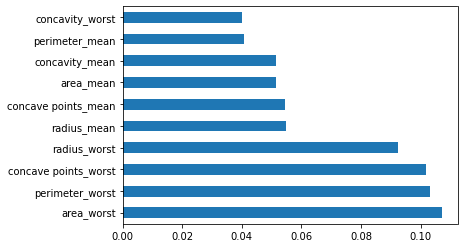

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
feature_x=dataset.drop(['id','diagnosis'],axis=1)
diagnosis_y=dataset['diagnosis']
model=ExtraTreesClassifier()
model.fit(feature_x,diagnosis_y)
print(model.feature_importances_)
feat_importance=pd.Series(model.feature_importances_,index=feature_x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

##Step 3 :Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

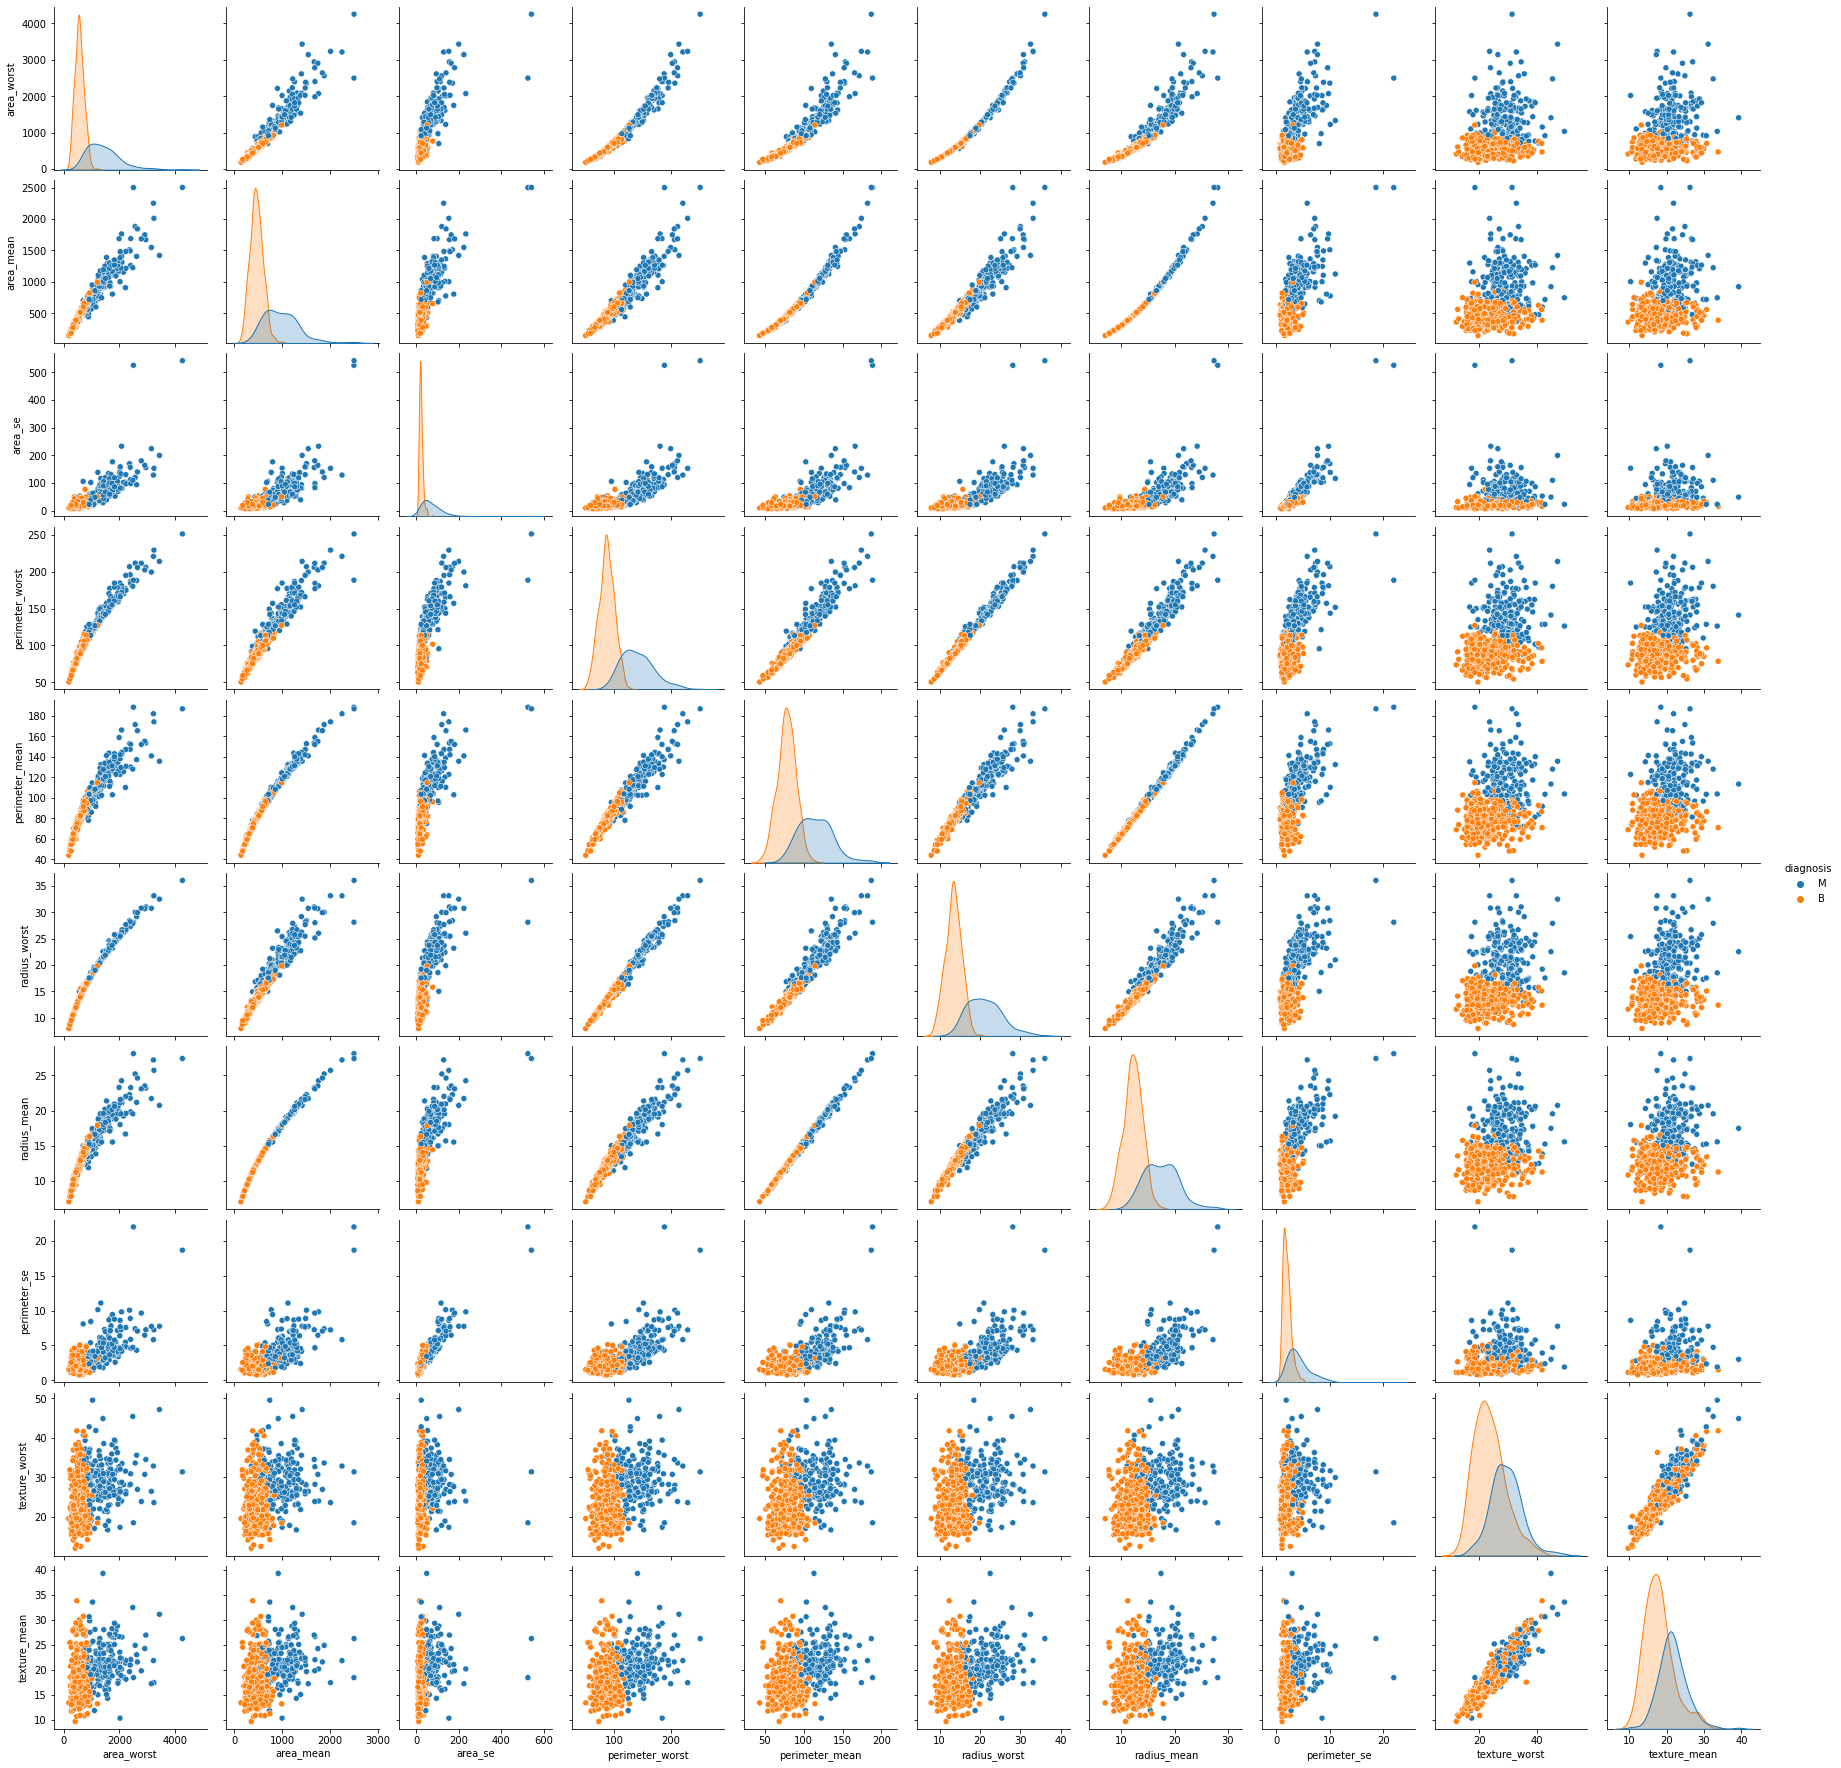

In [ ]:
features1=dataset[['diagnosis','area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','radius_worst','radius_mean','perimeter_se','texture_worst','texture_mean']] #feature selection
sns.pairplot(data=features1,hue='diagnosis',dropna=True)

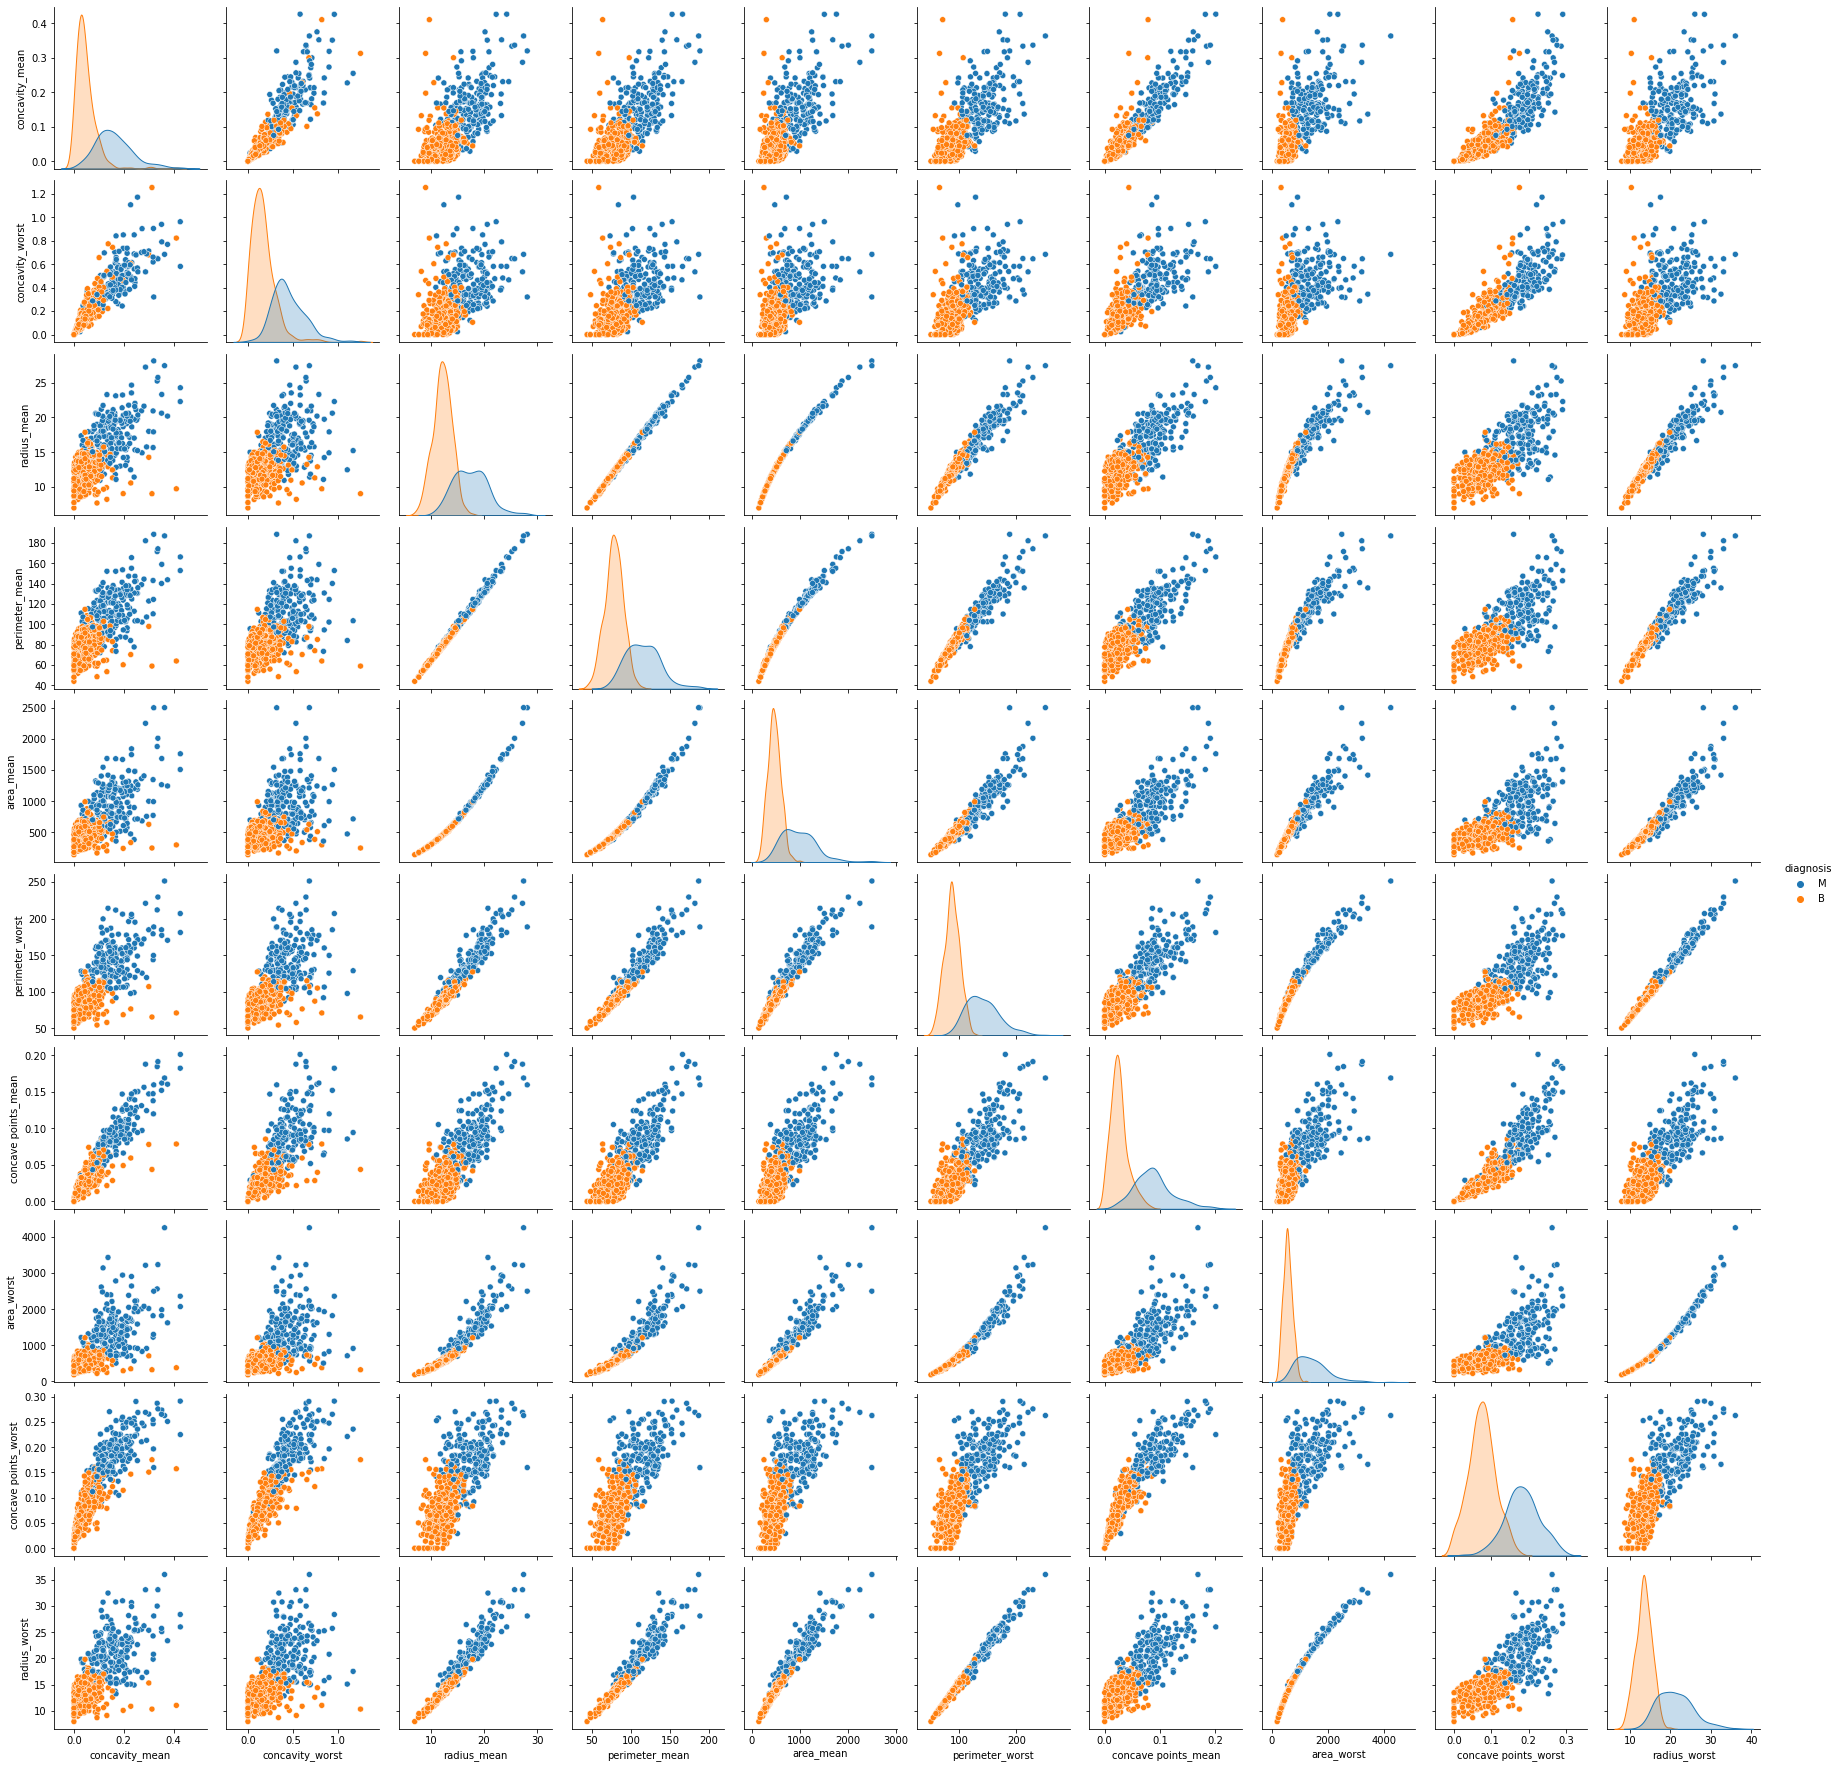

In [ ]:
features2=dataset[['diagnosis','concavity_mean','concavity_worst','radius_mean','perimeter_mean','area_mean','perimeter_worst','concave points_mean','area_worst','concave points_worst','radius_worst']] #feature selection
sns.pairplot(data=features2,hue='diagnosis',dropna=True)

##Step 4 : Standarize Variable

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features1.drop(['diagnosis'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features=scaler.transform(features1.drop(['diagnosis'],axis=1))

In [ ]:
data_feat=pd.DataFrame(scaled_features,columns=features1.columns[1:])
data_feat.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
0,2.001237,0.984375,2.487578,2.303601,1.269934,1.886690,1.097064,2.833031,-1.359293,-2.073335
1,1.890489,1.908708,0.742402,1.535126,1.685955,1.805927,1.829821,0.263327,-0.369203,-0.353632
2,1.456285,1.558884,1.181336,1.347475,1.566503,1.511870,1.579888,0.850928,-0.023974,0.456187
3,-0.550021,-0.764464,-0.288378,-0.249939,-0.592687,-0.281464,-0.768909,0.286593,0.133984,0.253732
4,1.220724,1.826229,1.190357,1.338539,1.776573,1.298575,1.750297,1.273189,-1.466770,-1.151816


##Step 5 : Preparing train set and test set

split the data into training set and test set using **train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_features,features1['diagnosis'],test_size=0.33)

##Step 6 :Implementing KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#decide K=
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
prediction=knn.predict(x_test)

##Confusing Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))

[[109   9]
 [  7  63]]


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           B       0.94      0.92      0.93       118
           M       0.88      0.90      0.89        70

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.92      0.91      0.92       188



##Choosing a K Value

In [ ]:
import numpy as np
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  prediction_i=knn.predict(x_test)
  error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

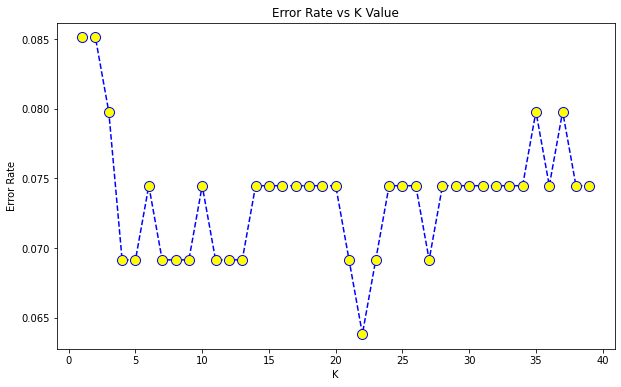

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor="yellow",markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##Change K Value base on graphic above

In [ ]:
#change K value
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print(confusion_matrix(y_test,prediction))

[[114   4]
 [  8  62]]


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       118
           M       0.94      0.89      0.91        70

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188

